In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
dataset = load_diabetes()
X = dataset.data
y = dataset.target
col_names = dataset.feature_names

In [ ]:
y = (y > 200) * 1

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=2).fit(X, y)

In [ ]:
from sklearn.metrics import roc_auc_score
p = model.predict_proba(X)[:, 1]
print(roc_auc_score(y, p))

0.998352256636029


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
Xf = pd.DataFrame(X, columns=col_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


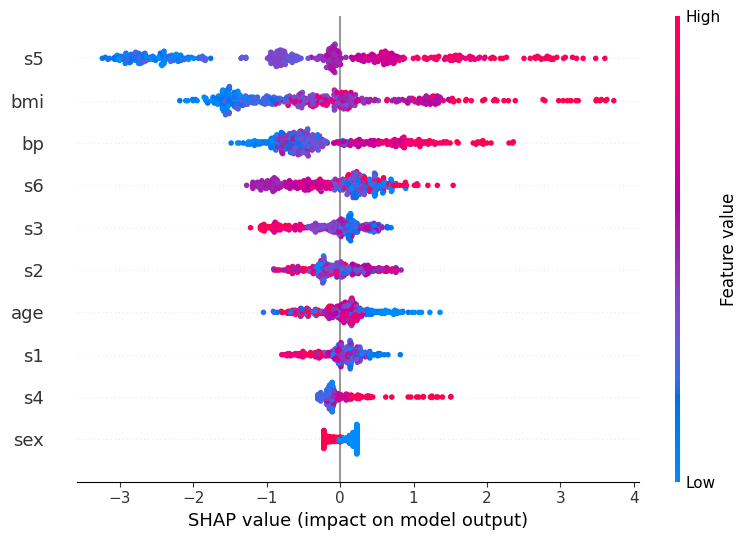

In [ ]:
shap.summary_plot(shap_values, Xf)

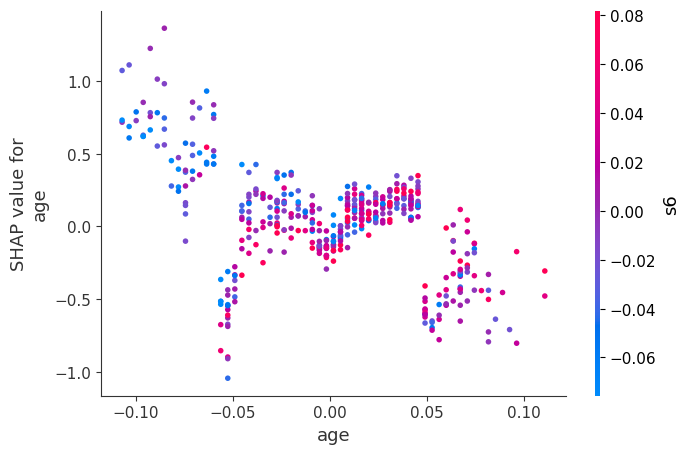

In [ ]:
shap.dependence_plot('age', shap_values, Xf, interaction_index='s6')

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap_interaction_values.shape

(442, 10, 10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


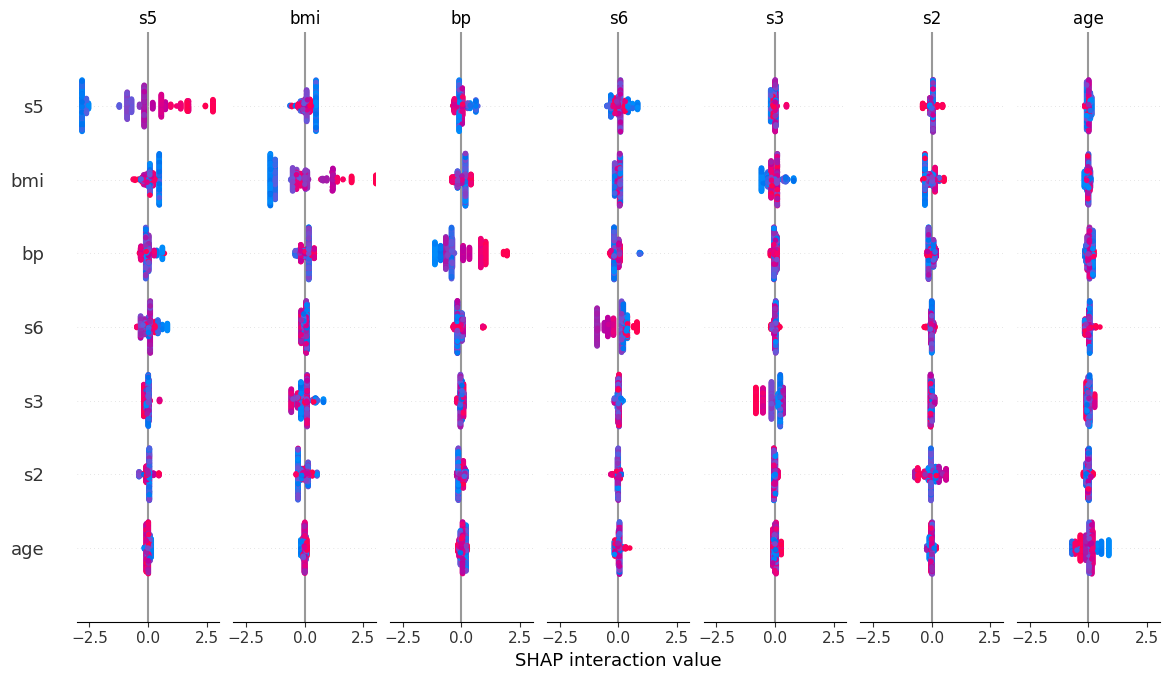

In [ ]:
shap.summary_plot(shap_interaction_values, Xf)

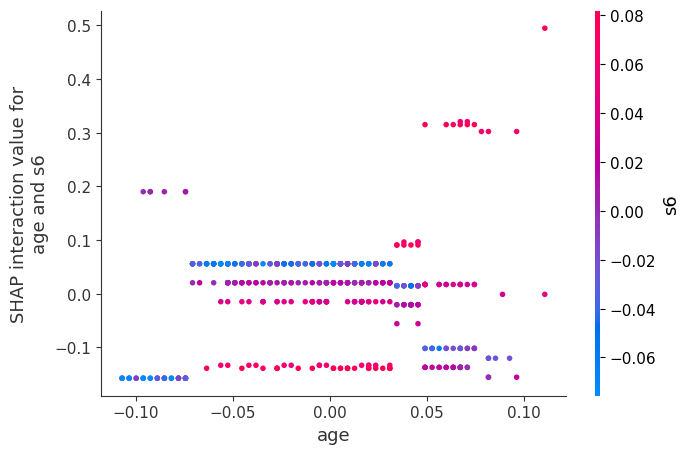

In [ ]:
shap.dependence_plot(('age', 's6'), shap_interaction_values, Xf)

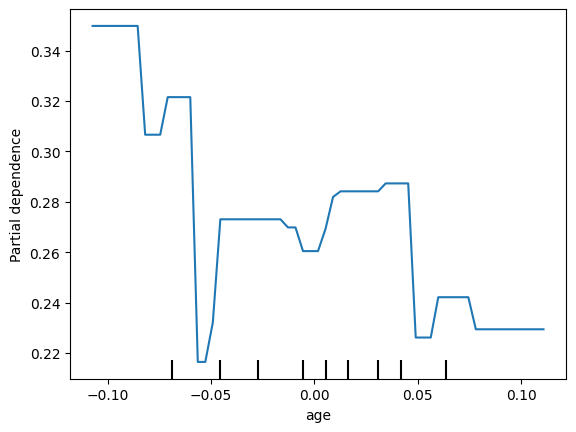

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model, Xf, ['age'])

In [ ]:
explainer_X = explainer(Xf)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


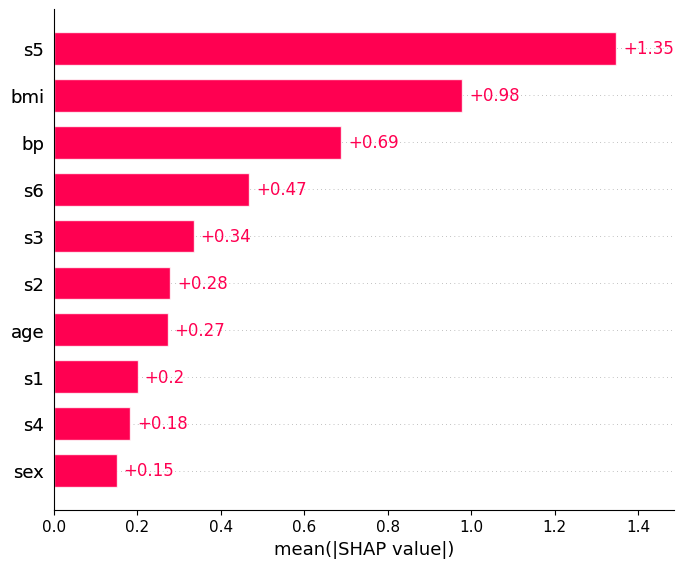

In [ ]:
shap.plots.bar(explainer_X)

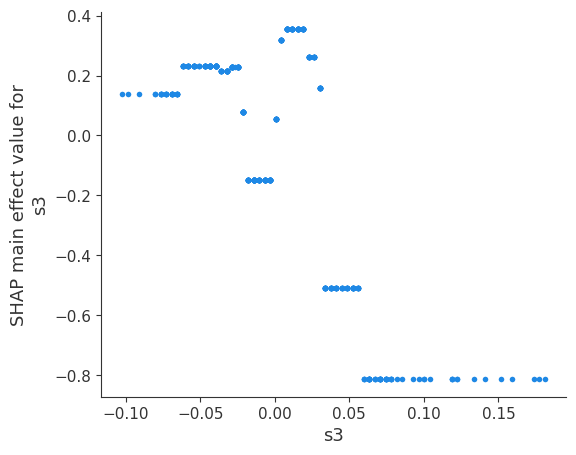

In [ ]:
shap.dependence_plot(('s3', 's3'), shap_interaction_values, Xf)